## Question 2

Given a list of planets discovered by KEPLER.

Kepler Data: https://drive.google.com/drive/folders/1GwqC4STc_KgVPofacQUzKHBMHQsmflvY?usp=sharing

Create an ML algorithm to classify the planets as Candidate/False positive/Confirmed etc based on the  column “koi_disposition”.


**Sub-questions for Problem 2**
+ Why did you choose the particular algorithm?
+ What are the different tuning methods used for the algorithm?
+ Did you consider any other choice of algorithm?Why or why not?
+ What is the accuracy?
+ What are the different types of metrics that can be used to evaluate the model?


**COLUMNS**

kepid:          KepID						
kepoi_name:     KOI Name					
kepler_name:    Kepler Name					
koi_disposition: Exoplanet Archive Disposition			
koi_pdisposition: Disposition Using Kepler Data			
koi_score:      Disposition Score					
koi_fpflag_nt:  Not Transit-Like False Positive Flag			
koi_fpflag_ss:  Stellar Eclipse False Positive Flag			
koi_fpflag_co:  Centroid Offset False Positive Flag			
koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag	
koi_period:     Orbital Period [days]				
koi_period_err1: Orbital Period Upper Unc. [days]			
koi_period_err2: Orbital Period Lower Unc. [days]			
koi_time0bk:    Transit Epoch [BKJD]				
koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD]			
koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD]			
koi_impact:     Impact Parameter					
koi_impact_err1: Impact Parameter Upper Unc.			
koi_impact_err2: Impact Parameter Lower Unc.			
koi_duration:   Transit Duration [hrs]				
koi_duration_err1: Transit Duration Upper Unc. [hrs]			
koi_duration_err2: Transit Duration Lower Unc. [hrs]			
koi_depth:      Transit Depth [ppm]				
koi_depth_err1: Transit Depth Upper Unc. [ppm]			
koi_depth_err2: Transit Depth Lower Unc. [ppm]			
koi_prad:       Planetary Radius [Earth radii]				
koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii]		
koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii]		
koi_teq:        Equilibrium Temperature [K]				
koi_teq_err1:   Equilibrium Temperature Upper Unc. [K]			
koi_teq_err2:   Equilibrium Temperature Lower Unc. [K]			
koi_insol:      Insolation Flux [Earth flux]				
koi_insol_err1: Insolation Flux Upper Unc. [Earth flux]			
koi_insol_err2: Insolation Flux Lower Unc. [Earth flux]			
koi_model_snr:  Transit Signal-to-Noise				
koi_tce_plnt_num: TCE Planet Number
koi_tce_delivname: TCE Delivery					
koi_steff:      Stellar Effective Temperature [K]			
koi_steff_err1: Stellar Effective Temperature Upper Unc. [K]		
koi_steff_err2: Stellar Effective Temperature Lower Unc. [K]		
koi_slogg:      Stellar Surface Gravity [log10(cm/s**2)]			
koi_slogg_err1: Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]		
koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]		
koi_srad:       Stellar Radius [Solar radii]				
koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii]			
koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii]			
ra:             RA [decimal degrees]					
dec:            Dec [decimal degrees]					
koi_kepmag:     Kepler-band [mag]

### DATA CALLING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Kepler_data=pd.read_csv('kepler_data.csv')
Kepler_data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


### DATA UNDERSTANDING

In [3]:
Kepler_data.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [4]:
Kepler_data.shape

(9564, 49)

In [5]:
Kepler_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [6]:
Kepler_data.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name          7204
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

In [7]:
Kepler_data["koi_disposition"].unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [8]:
Kepler_data["koi_disposition"].value_counts().sort_index(ascending=True)

CANDIDATE         2366
CONFIRMED         2358
FALSE POSITIVE    4840
Name: koi_disposition, dtype: int64

In [9]:
Kepler_data[Kepler_data.duplicated()].shape

(0, 49)

In [10]:
Kepler_data["koi_tce_plnt_num"].unique()

array([ 1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [11]:
Kepler_data["koi_tce_plnt_num"].value_counts().sort_index(ascending=True)

1.0    7745
2.0     972
3.0     326
4.0     111
5.0      41
6.0      14
7.0       8
8.0       1
Name: koi_tce_plnt_num, dtype: int64

In [12]:
Kepler_data.describe().T

,count,mean,std,min,25%,50%,75%,max
kepid,9564.0,7.690628e+06,2.653459e+06,7.574500e+05,5.556034e+06,7.906892e+06,9.873066e+06,1.293514e+07
koi_score,8054.0,4.808294e-01,4.769285e-01,0.000000e+00,0.000000e+00,3.340000e-01,9.980000e-01,1.000000e+00
koi_fpflag_nt,9564.0,2.085947e-01,4.767290e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.650000e+02
koi_fpflag_ss,9564.0,2.327478e-01,4.226049e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
koi_fpflag_co,9564.0,1.975115e-01,3.981423e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
koi_fpflag_ec,9564.0,1.200335e-01,3.250176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
koi_period,9564.0,7.567136e+01,1.334744e+03,2.418425e-01,2.733684e+00,9.752831e+00,4.071518e+01,1.299958e+05
koi_period_err1,9110.0,2.148471e-03,8.242604e-03,0.000000e+00,5.350000e-06,3.520000e-05,2.760000e-04,1.730000e-01
koi_period_err2,9110.0,-2.148471e-03,8.242604e-03,-1.730000e-01,-2.760000e-04,-3.520000e-05,-5.350000e-06,0.000000e+00
koi_time0bk,9564.0,1.661833e+02,6.791896e+01,1.205159e+02,1.327617e+02,1.372246e+02,1.706946e+02,1.472522e+03


In [13]:
from scipy import stats

# Select columns with numeric data for outlier detection
columns_to_check = [
    'koi_period',
    'koi_period_err1',
    'koi_period_err2',
    'koi_time0bk',
    'koi_time0bk_err1',
    'koi_time0bk_err2',
    'koi_impact',
    'koi_impact_err1',
    'koi_impact_err2',
    'koi_duration',
    'koi_duration_err1',
    'koi_duration_err2',
    'koi_depth',
    'koi_depth_err1',
    'koi_depth_err2',
    'koi_prad',
    'koi_prad_err1',
    'koi_prad_err2',
    'koi_teq',
    'koi_teq_err1',
    'koi_teq_err2',
    'koi_insol',
    'koi_insol_err1',
    'koi_insol_err2',
    'koi_model_snr',
    'koi_tce_plnt_num',
    'koi_steff',
    'koi_steff_err1',
    'koi_steff_err2',
    'koi_slogg',
    'koi_slogg_err1',
    'koi_slogg_err2',
    'koi_srad',
    'koi_srad_err1',
    'koi_srad_err2',
    'koi_kepmag'
]

# Calculate Z-scores for each specified column
z_scores = pd.DataFrame()
for column in columns_to_check:
    z_scores[column] = np.abs(stats.zscore(Kepler_data[column]))

# Define a threshold for identifying outliers (e.g., Z-score greater than 3)
threshold = 3

# Identify outliers based on the threshold
outliers = (z_scores > threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Print the columns with the number of outliers
print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
koi_period             1
koi_period_err1        0
koi_period_err2        0
koi_time0bk          244
koi_time0bk_err1       0
koi_time0bk_err2       0
koi_impact             0
koi_impact_err1        0
koi_impact_err2        0
koi_duration         149
koi_duration_err1      0
koi_duration_err2      0
koi_depth              0
koi_depth_err1         0
koi_depth_err2         0
koi_prad               0
koi_prad_err1          0
koi_prad_err2          0
koi_teq                0
koi_teq_err1           0
koi_teq_err2           0
koi_insol              0
koi_insol_err1         0
koi_insol_err2         0
koi_model_snr          0
koi_tce_plnt_num       0
koi_steff              0
koi_steff_err1         0
koi_steff_err2         0
koi_slogg              0
koi_slogg_err1         0
koi_slogg_err2         0
koi_srad               0
koi_srad_err1          0
koi_srad_err2          0
koi_kepmag             0
dtype: int64


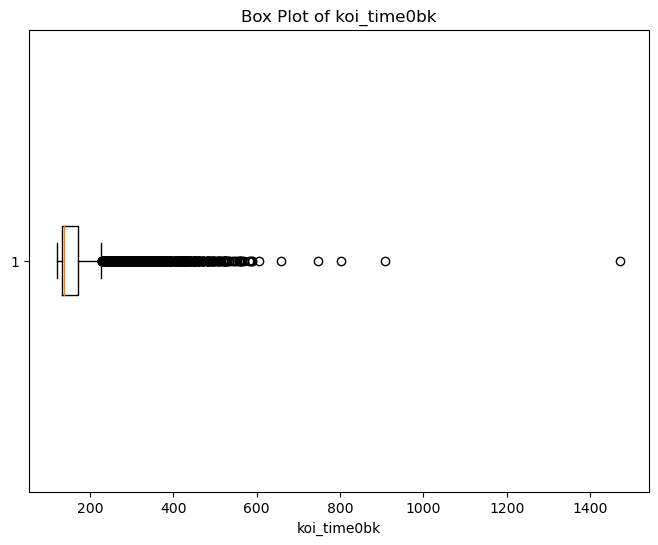

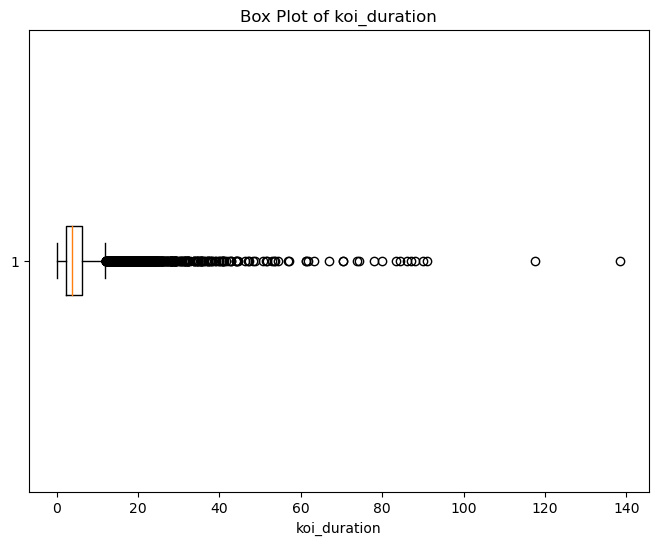

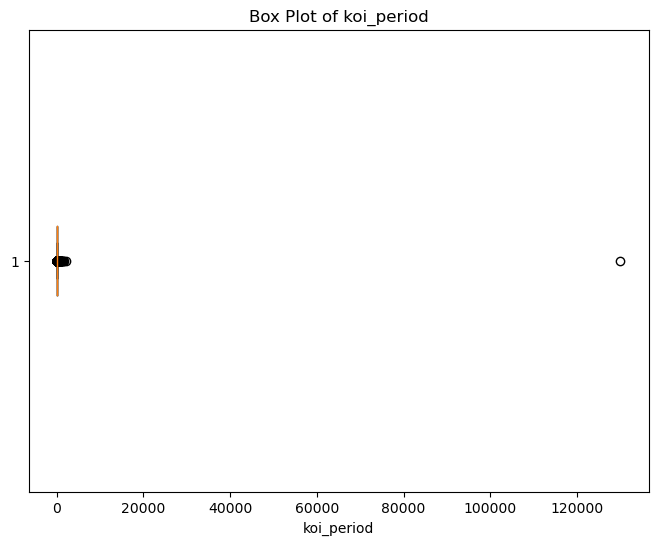

In [14]:
# Define the columns with outliers
columns_with_outliers = ["koi_time0bk", "koi_duration", "koi_period"]

# Create box plots for columns with outliers
for column in columns_with_outliers:
    plt.figure(figsize=(8, 6))
    plt.boxplot(Kepler_data[column], vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

### DATA PRE-PROCESSING

In [15]:
Kepler_data.drop(columns=['koi_teq_err1', 'koi_teq_err2'], inplace=True)

In [16]:
Kepler_data['kepler_name'].fillna(method='bfill', inplace=True) 


# Forward-fill missing values (carry the previous value forward)
Kepler_data['koi_score'].fillna(method='ffill', inplace=True)

# Forward-fill missing values (carry the previous value forward)
Kepler_data['koi_period_err1'].fillna(method='ffill', inplace=True)

Kepler_data['koi_period_err2'].fillna(method='ffill', inplace=True)

# Backward-fill missing values (carry the next value backward)
Kepler_data['koi_time0bk_err1'].fillna(method='bfill', inplace=True)

Kepler_data['koi_time0bk_err2'].fillna(method='bfill', inplace=True)

# Fill multiple columns at once
columns_to_fill = ['koi_impact', 'koi_depth', 'koi_prad']
for col in columns_to_fill:
    Kepler_data[col].fillna(Kepler_data[col].mean(), inplace=True)
    

Kepler_data['koi_teq'].fillna(method='ffill', inplace=True)

columns_for_fill = ['koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 
       'koi_depth_err1', 'koi_depth_err2',  'koi_prad_err1',
       'koi_prad_err2']
for col in columns_for_fill:
    Kepler_data[col].fillna(Kepler_data[col].mean(), inplace=True)
    
# Fill missing values with a value based on another column
Kepler_data['koi_tce_plnt_num'].fillna(Kepler_data['koi_tce_plnt_num'].median(), inplace=True)

Kepler_data['koi_model_snr'].fillna(Kepler_data['koi_model_snr'].median(), inplace=True)

# Fill missing values with the most frequent value in the column
Kepler_data['koi_tce_delivname'].fillna(Kepler_data['koi_tce_delivname'].mode().iloc[0], inplace=True)

# For columns with only a few missing values, you can fill them with a specific value, e.g., 0
Kepler_data['koi_insol'].fillna(0, inplace=True)

Kepler_data['koi_insol_err1'].fillna(0, inplace=True)
Kepler_data['koi_insol_err2'].fillna(0, inplace=True)

columns_fill = ['koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2']
for col in columns_fill:
    Kepler_data[col].fillna(Kepler_data[col].mean(), inplace=True)

# If you want to drop rows with missing values, you can use the following:
Kepler_data.dropna(subset=['koi_kepmag'], inplace=True)

In [17]:
Kepler_data.isnull().sum()

kepid                  0
kepoi_name             0
kepler_name          480
koi_disposition        0
koi_pdisposition       0
koi_score              0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1        0
koi_period_err2        0
koi_time0bk            0
koi_time0bk_err1       0
koi_time0bk_err2       0
koi_impact             0
koi_impact_err1        0
koi_impact_err2        0
koi_duration           0
koi_duration_err1      0
koi_duration_err2      0
koi_depth              0
koi_depth_err1         0
koi_depth_err2         0
koi_prad               0
koi_prad_err1          0
koi_prad_err2          0
koi_teq                0
koi_insol              0
koi_insol_err1         0
koi_insol_err2         0
koi_model_snr          0
koi_tce_plnt_num       0
koi_tce_delivname      0
koi_steff              0
koi_steff_err1         0
koi_steff_err2         0
koi_slogg              0
koi_slogg_err1         0


In [18]:
Kepler_data['kepler_name'].fillna(method='ffill', inplace=True) 

In [19]:
Kepler_data['kepler_name'].isnull().sum()

0

In [20]:
from scipy.stats.mstats import winsorize

# Define the columns with outliers
columns_with_outliers = ["koi_time0bk", "koi_duration"]

# Apply Winsorization to each column
for column in columns_with_outliers:
    winsorized_column = winsorize(Kepler_data[column], limits=[0.05, 0.05])
    Kepler_data[column] = winsorized_column

# Now, the specified columns have been Winsorized, which replaces extreme values with less extreme values.


### EXPLORATORY DATA ANALYSIS

In [21]:
Kepler_data.corr()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
kepid,1.000000,0.082517,0.008132,-0.048272,-0.098761,-0.044299,0.011502,0.011889,-0.011889,0.010764,...,0.003046,0.051347,-0.026025,-0.023484,-0.026692,-0.027160,0.024089,-0.002366,0.993589,0.017525
koi_score,0.082517,1.000000,-0.010056,-0.471284,-0.429181,-0.340481,-0.018997,-0.087589,0.087589,-0.026779,...,0.302312,0.140915,-0.146031,0.177875,-0.067973,-0.111129,0.070630,-0.142296,0.082945,0.051253
koi_fpflag_nt,0.008132,-0.010056,1.000000,-0.023266,-0.004577,0.000574,0.001554,0.021176,-0.021176,0.018173,...,-0.011201,-0.001980,-0.001589,-0.006559,0.000392,0.002640,-0.001159,0.012691,0.007908,-0.003753
koi_fpflag_ss,-0.048272,-0.471284,-0.023266,1.000000,0.151355,0.096626,-0.020550,-0.135027,0.135027,-0.132480,...,-0.172376,-0.075474,0.121225,-0.042852,0.046779,0.050176,-0.044780,0.086461,-0.047814,0.000628
koi_fpflag_co,-0.098761,-0.429181,-0.004577,0.151355,1.000000,0.523842,-0.020807,-0.091257,0.091257,-0.142326,...,-0.109937,-0.018740,-0.007335,-0.050052,0.041250,0.037430,-0.030407,0.159907,-0.097277,0.060592
koi_fpflag_ec,-0.044299,-0.340481,0.000574,0.096626,0.523842,1.000000,-0.017023,-0.082384,0.082384,-0.117852,...,-0.076679,0.002046,-0.005208,-0.036095,0.019175,0.026473,-0.009979,0.070485,-0.045190,0.039075
koi_period,0.011502,-0.018997,0.001554,-0.020550,-0.020807,-0.017023,1.000000,0.052077,-0.052077,0.097002,...,0.003193,0.001878,-0.006464,-0.003179,-0.000994,-0.000435,0.001555,0.005668,0.011471,-0.009858
koi_period_err1,0.011889,-0.087589,0.021176,-0.135027,-0.091257,-0.082384,0.052077,1.000000,-1.000000,0.429076,...,-0.056811,-0.004621,0.004283,-0.178095,0.003305,0.028642,0.000254,-0.033061,0.009844,-0.028402
koi_period_err2,-0.011889,0.087589,-0.021176,0.135027,0.091257,0.082384,-0.052077,-1.000000,1.000000,-0.429076,...,0.056811,0.004621,-0.004283,0.178095,-0.003305,-0.028642,-0.000254,0.033061,-0.009844,0.028402
koi_time0bk,0.010764,-0.026779,0.018173,-0.132480,-0.142326,-0.117852,0.097002,0.429076,-0.429076,1.000000,...,-0.015552,-0.004948,-0.043213,-0.124096,-0.003631,0.010412,0.010989,-0.038822,0.009662,0.009154


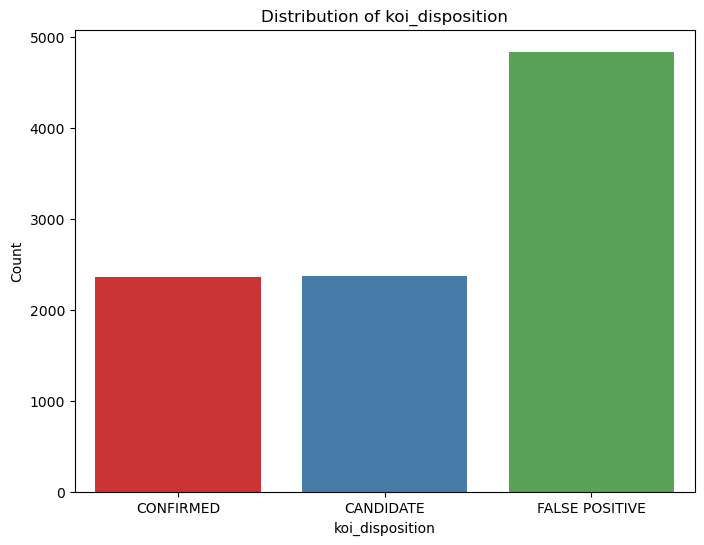

In [22]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=Kepler_data, x='koi_disposition', palette='Set1')
plt.title("Distribution of koi_disposition")
plt.xlabel("koi_disposition")
plt.ylabel("Count")
plt.show()

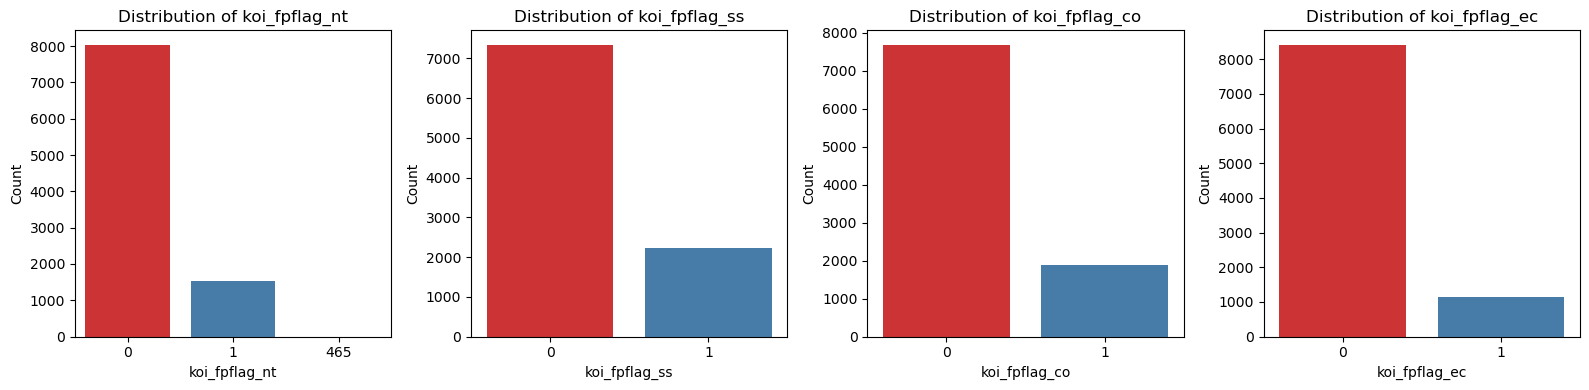

In [23]:
# Create subplots for each column
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# List of columns to plot
columns_to_plot = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']

# Create count plots for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=Kepler_data, x=column, ax=axes[i], palette='Set1')
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

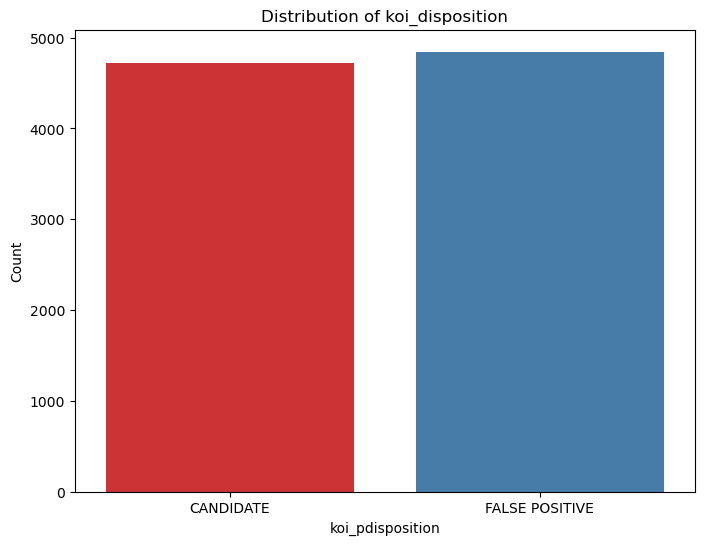

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=Kepler_data, x='koi_pdisposition', palette='Set1')
plt.title("Distribution of koi_disposition")
plt.xlabel("koi_pdisposition")
plt.ylabel("Count")
plt.show()

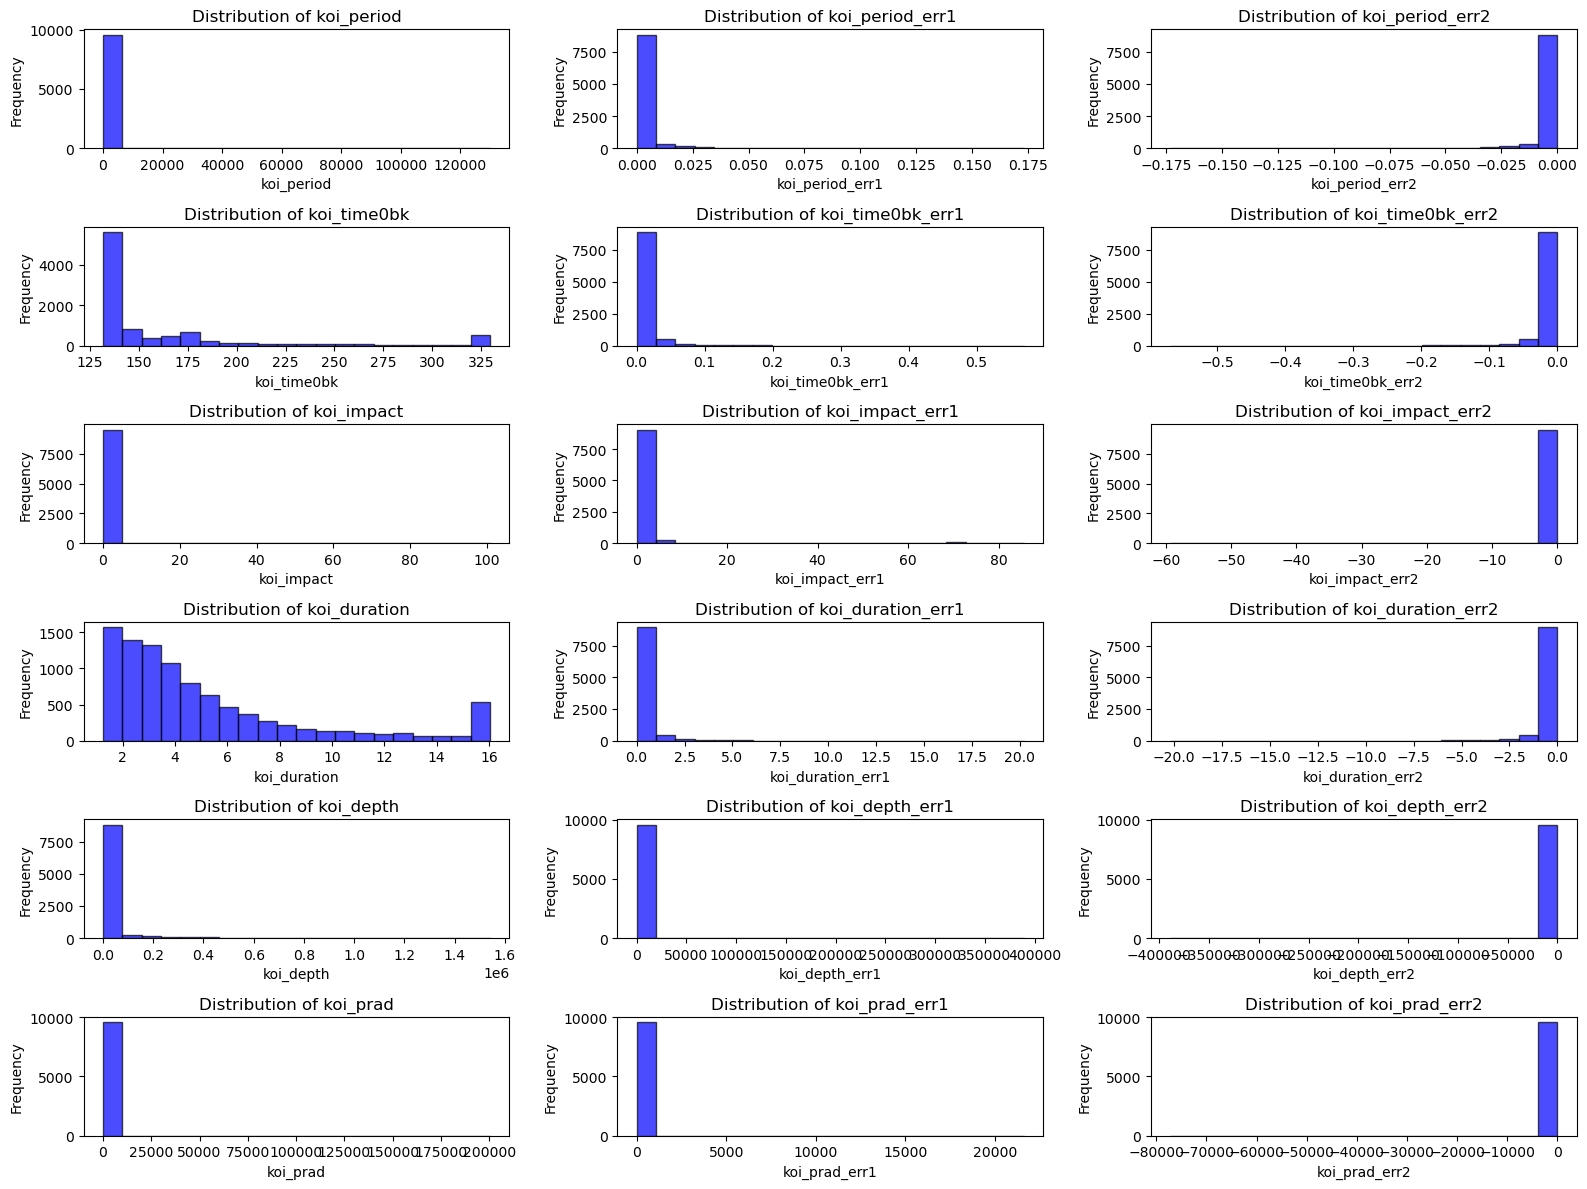

In [25]:
# List of columns to plot
columns_to_plot = [
    'koi_period', 'koi_period_err1', 'koi_period_err2',
    'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2',
    'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
    'koi_duration', 'koi_duration_err1', 'koi_duration_err2',
    'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
    'koi_prad', 'koi_prad_err1', 'koi_prad_err2'
]

# Create subplots for each column
fig, axes = plt.subplots(6, 3, figsize=(16, 12))
axes = axes.ravel()

# Create histograms for each column
for i, column in enumerate(columns_to_plot):
    axes[i].hist(Kepler_data[column], bins=20, edgecolor='k', alpha=0.7, color='blue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

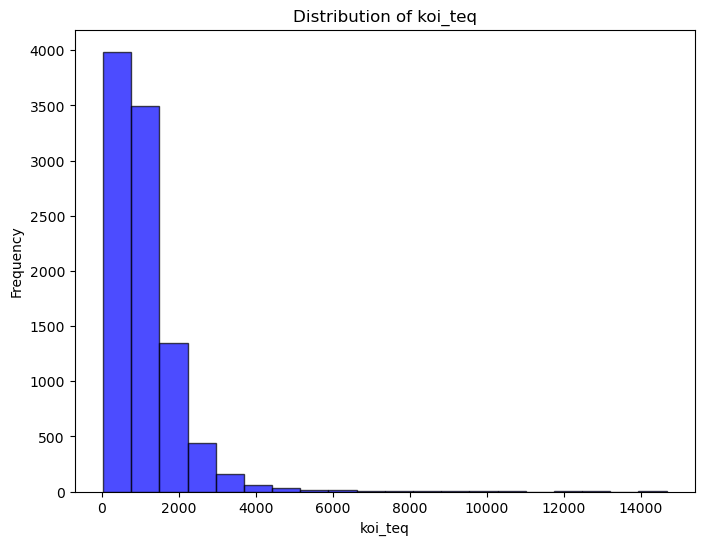

In [26]:
# Create a histogram for the 'koi_teq' column
plt.figure(figsize=(8, 6))
plt.hist(Kepler_data['koi_teq'], bins=20, edgecolor='k', alpha=0.7, color='blue')
plt.title("Distribution of koi_teq")
plt.xlabel("koi_teq")
plt.ylabel("Frequency")
plt.show()

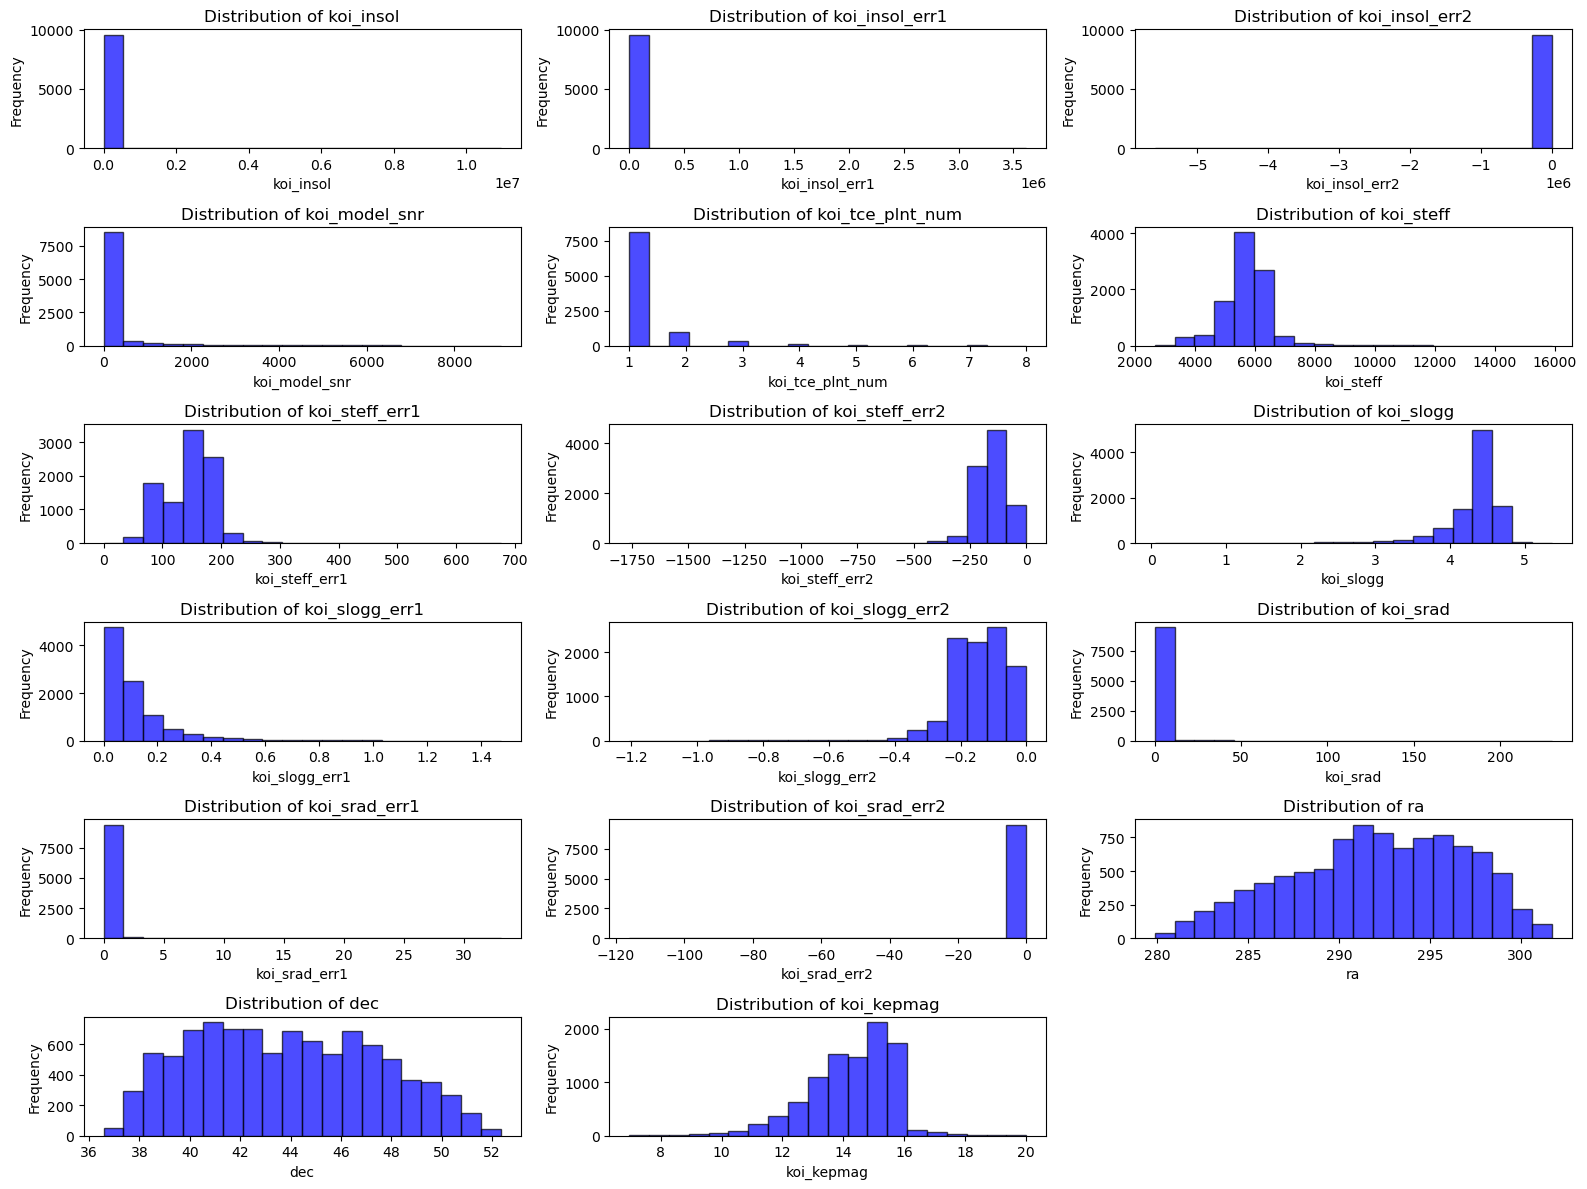

In [27]:
# List of columns to plot
columns_to_plot = [
    'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr',
    'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
    'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
    'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'
]

# Create subplots for each column
fig, axes = plt.subplots(6, 3, figsize=(16, 12))
axes = axes.ravel()

# Create histograms for each column
for i, column in enumerate(columns_to_plot):
    axes[i].hist(Kepler_data[column], bins=20, edgecolor='k', alpha=0.7, color='blue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


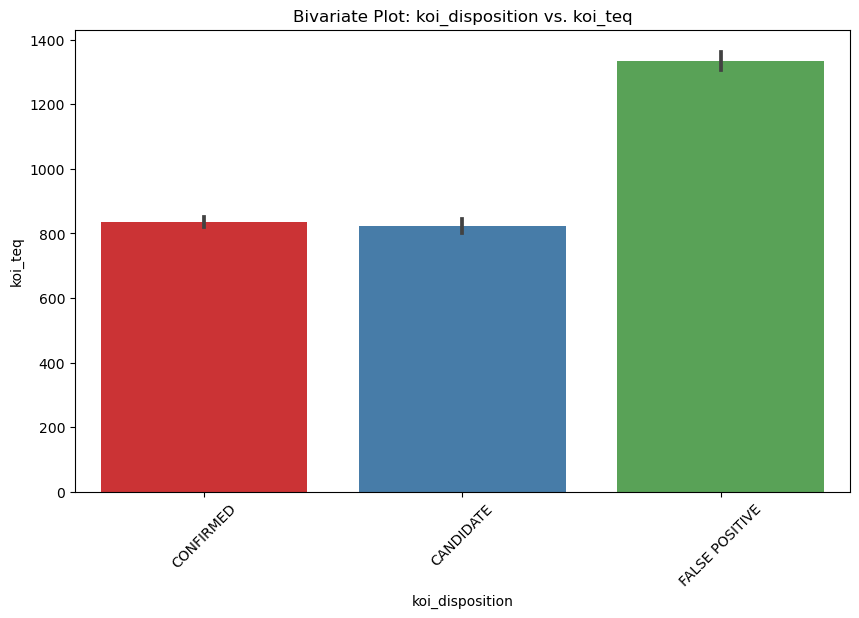

In [28]:
# Create a bar plot to show 'koi_teq' by 'koi_disposition'
plt.figure(figsize=(10, 6))
sns.barplot(data=Kepler_data, x='koi_disposition', y='koi_teq', palette='Set1')
plt.title("Bivariate Plot: koi_disposition vs. koi_teq")
plt.xlabel("koi_disposition")
plt.ylabel("koi_teq")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### FEATURE ENGINEERING

In [29]:
Kepler_data.drop(columns=['koi_tce_delivname'], inplace=True)

In [30]:
# Perform one-hot encoding for 'koi_disposition'
Kepler_data= pd.get_dummies(Kepler_data, columns=['koi_disposition'], prefix='koi_disposition')

# Perform one-hot encoding for 'koi_pdisposition'
Kepler_data= pd.get_dummies(Kepler_data, columns=['koi_pdisposition'], prefix='koi_pdisposition')


In [31]:
Kepler_data.drop(columns=['kepler_name'], inplace=True)

In [32]:
Kepler_data['kepoi_name'].str.isalnum()

0       False
1       False
2       False
3       False
4       False
        ...  
9559    False
9560    False
9561    False
9562    False
9563    False
Name: kepoi_name, Length: 9563, dtype: bool

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Kepler_data['kepoi_name_encoded'] = le.fit_transform(Kepler_data['kepoi_name'])


In [34]:
Kepler_data.drop(columns=['kepoi_name','kepid'], inplace=True)

In [35]:
Kepler_data.columns

Index(['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag',
       'koi_disposition_CANDIDATE', 'koi_disposition_CONFIRMED',
       'koi_disposition_FALSE POSITIVE', 'koi_pdisposition_CANDIDATE',
       'koi_pdisposition_FALSE POSITIVE', 'kepoi_name_encoded'],
      dtype='object')

### DATA TRANSFORMATION

In [36]:
from sklearn.preprocessing import StandardScaler


# List of columns to scale
columns_to_scale = ['koi_period', 'koi_time0bk', 'koi_duration', 'koi_prad',
                    'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
                    'koi_model_snr', 'koi_steff', 'koi_steff_err1',
                    'koi_steff_err2', 'koi_slogg', 'ra', 'dec', 'koi_kepmag']

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply scaling to the selected columns
Kepler_data[columns_to_scale] = scaler.fit_transform(Kepler_data[columns_to_scale])


### MODEL BUILDING,TRAINING & EVALUATION

**Using Random Forest Classifier**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = Kepler_data.drop(['koi_disposition_CANDIDATE', 'koi_disposition_CONFIRMED', 'koi_disposition_FALSE POSITIVE','kepoi_name_encoded'], axis=1)
y = Kepler_data[['koi_disposition_CANDIDATE', 'koi_disposition_CONFIRMED', 'koi_disposition_FALSE POSITIVE']]


In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Create and train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Make predictions
y_pred = clf.predict(X_test)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.9184526921066388
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       472
           1       0.83      0.86      0.84       476
           2       1.00      1.00      1.00       965

   micro avg       0.92      0.92      0.92      1913
   macro avg       0.89      0.89      0.89      1913
weighted avg       0.92      0.92      0.92      1913
 samples avg       0.92      0.92      0.92      1913




1. **Why did you choose the particular algorithm?**
   - The particular algorithm chosen for the model is the **Random Forest Classifier**.Because:
     - Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy.
     - It is known for its ability to handle both classification and regression tasks effectively.
     - Random Forest is robust to overfitting and has ability to handle complex datasets with high-dimensional features.
     - It can provide feature importance scores, helping to understand the importance of each feature in making predictions.
     - It is a popular choice for many classification tasks due to its overall strong performance and ability to handle a      variety of data types.


3. **Did you consider any other choice of algorithm? Why or why not?**
   - The choice of Random Forest is a common and reasonable starting point for classification tasks. However, the choice of algorithm should depend on the characteristics of our dataset and  specific problem. Other algorithms that could be considered include:
     - Decision Trees: Simple and interpretable but can be prone to overfitting.
     - Support Vector Machine (SVM): Effective for binary classification but may require more complex configurations for multi-class problems.
     - Gradient Boosting methods (e.g., XGBoost, LightGBM): Known for high predictive performance but may require more careful tuning.
     - Neural Networks: Suitable for complex patterns but may require a larger dataset and more computational resources.
  
  The choice of algorithm depends on your dataset, problem, and the trade-offs between interpretability, accuracy, and computational requirements.

4. **What is the accuracy?**
   - The accuracy reported in my output is approximately 0.9185 or 91.85%. This accuracy represents the overall correctness of predictions made by the model.

5. **What are the different types of metrics that can be used to evaluate the model?**
   - The output also provides other classification metrics, including precision, recall, and F1-score. These metrics are computed for each class (in this case, each encoded label) and give you insights into the model's performance:
     - Precision: The ability of the model to correctly classify instances of a class among all instances predicted as that class.
     - Recall: The ability of the model to correctly identify all instances of a class among all instances that belong to that class.
     - F1-score: The harmonic mean of precision and recall, providing a balance between the two metrics.
   
  These metrics help you understand the model's performance on each class separately and are especially useful for imbalanced datasets.


### MODEL TUNING

**Using Random Search**

In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter ranges
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest model
rf = RandomForestClassifier()

# Perform Random Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1)

# Fit the model to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train a model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_rf_model.predict(X_test)


In [48]:
y_pred

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9184526921066388
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       472
           1       0.82      0.86      0.84       476
           2       1.00      1.00      1.00       965

   micro avg       0.92      0.92      0.92      1913
   macro avg       0.89      0.89      0.89      1913
weighted avg       0.92      0.92      0.92      1913
 samples avg       0.92      0.92      0.92      1913



**Using Grid Search**

In [49]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create a Random Forest model
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Accuracy: 0.9215891270256142


In [50]:
# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       472
           1       0.83      0.87      0.85       476
           2       1.00      1.00      1.00       965

   micro avg       0.92      0.92      0.92      1913
   macro avg       0.90      0.89      0.89      1913
weighted avg       0.92      0.92      0.92      1913
 samples avg       0.92      0.92      0.92      1913



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



2. **What are the different tuning methods used for the algorithm?**
   - Hyperparameter tuning methods were used to optimize the performance of the Random Forest Classifier.Here I used, both Grid Search and Random Search as tuning methods. These methods systematically explore different combinations of hyperparameters to find the best set of hyperparameters for the model. Grid Search performs an exhaustive search over predefined hyperparameter values, while Random Search randomly samples hyperparameter values.


4. **What is the accuracy?**
   - The accuracy reported in the output after tuning using Grid Search is approximately 0.9216, or 92.16%. This accuracy represents the overall correctness of predictions made by the model.